# Example 7

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# algemene gegevens
x = sym.symbols('x')
EI, EA = sym.symbols('EI EA')
CV, CM, Cphi, Cuz, CN, Cux = sym.symbols('C_V C_M C_phi C_uz C_N C_ux') 
dx = 2*10**-15

# gegevens constructie
a0, a1, a2, a3, a4, a5 = 0, 3, 7, 12, 16, 19
aa = [a0, a1, a2, a3, a4, a5]
o0, o1, o2, o3, o4 = -sym.pi, sym.pi/2, sym.atan(-4/3), sym.pi/2, -sym.pi
oo = [o0, o1, o2, o3, o4]

# sprongen in de x functie
#= sym.symbols('phi^ij u_v^ij u_h^ij')
#s1 = 
ss = []

# gegevens belastingen
Fv, Fh = 40, -30
RvA, RvB, RhB = sym.symbols('R_v^A R_v^B R_h^B')
phisA, phisCB, phisBD, phisD = sym.symbols('phi_s^A phi_s^CB phi_s^BD phi_s^D')
VBC, HBC, VBD, HBD, VCD, HCD = sym.symbols('V^BC H^BC V^BD H^BD V^CD H^CD')
B = [RvB, RhB, VBC, HBC, VBD, HBD, RvA, phisA, Fv, VCD, HCD, phisCB, -VBC, -HBC, -VBD, -HBD, phisBD, Fh, phisD, -VCD, -HCD]
b1, b2, b3, b4, b5, b6, b7, b8 = 0, 3, 7, 7+2*dx, 12, 12+2*dx, 16, 19
bb = [b1, b1, b1, b1, b1, b1, b2, b2, b3, b3, b3, b4, b5, b5, b6, b6, b6, b7, b7, b8, b8]
# K = 1, Fv = 2, Fh = 3, qv = 4, qh = 5, phi = 6, uz = 7, ux = 8
nn = [2, 3, 2, 3, 2, 3, 2, 6, 2, 2, 3, 6, 2, 3, 2, 3, 6, 3, 6, 2, 3]

In [3]:
#qz opstellen
qz = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 1:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[-1])
            if nn[i] == 4:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            if nn[i] == 5:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 1:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
                if nn[i] == 2:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 3:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[j-1])
                if nn[i] == 4:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 5:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[j-1])
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 7:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-4) * EI
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.sin(oo[j]) - sym.sin(oo[j-1]))
            if nn[i] == 4:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))
            if nn[i] == 5:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.sin(oo[j]) - sym.sin(oo[j-1])))

display(qz)

EI*phi_s^A*SingularityFunction(x, 3, -3) + EI*phi_s^BD*SingularityFunction(x, 12.0, -3) + EI*phi_s^CB*SingularityFunction(x, 7.0, -3) + EI*phi_s^D*SingularityFunction(x, 16, -3) + H^BC*SingularityFunction(x, 3, -1) - 1.8*H^BC*SingularityFunction(x, 7, -1) + 0.8*H^BC*SingularityFunction(x, 12, -1) + H^BD*SingularityFunction(x, 3, -1) - 1.8*H^BD*SingularityFunction(x, 7, -1) + 1.8*H^BD*SingularityFunction(x, 12, -1) - H^BD*SingularityFunction(x, 12.0, -1) - 0.8*H^CD*SingularityFunction(x, 7, -1) + 1.8*H^CD*SingularityFunction(x, 12, -1) - H^CD*SingularityFunction(x, 16, -1) + R_h^B*SingularityFunction(x, 3, -1) - 1.8*R_h^B*SingularityFunction(x, 7, -1) + 1.8*R_h^B*SingularityFunction(x, 12, -1) - R_h^B*SingularityFunction(x, 16, -1) + 0.6*R_v^A*SingularityFunction(x, 7, -1) - 0.6*R_v^A*SingularityFunction(x, 12, -1) - R_v^A*SingularityFunction(x, 16, -1) - R_v^B*SingularityFunction(x, 0, -1) + R_v^B*SingularityFunction(x, 3, -1) + 0.6*R_v^B*SingularityFunction(x, 7, -1) - 0.6*R_v^B*Singu

In [4]:
#qx opstellen
qx = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[-1])
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 4:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[-1])
            if nn[i] == 5:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 2:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[j-1])
                if nn[i] == 3:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 4:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[j-1])
                if nn[i] == 5:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 8:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-2) * EA
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (-sym.sin(oo[j]) + sym.sin(oo[j-1]))
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 4:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (-sym.sin(oo[j]) + sym.sin(oo[j-1])))
            if nn[i] == 5:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))

display(qx)

-H^BC*SingularityFunction(x, 0, -1) + H^BC*SingularityFunction(x, 3, -1) + 0.6*H^BC*SingularityFunction(x, 7, -1) - 0.6*H^BC*SingularityFunction(x, 12, -1) - H^BD*SingularityFunction(x, 0, -1) + H^BD*SingularityFunction(x, 3, -1) + 0.6*H^BD*SingularityFunction(x, 7, -1) - 0.6*H^BD*SingularityFunction(x, 12, -1) + 0.6*H^CD*SingularityFunction(x, 7, -1) - 0.6*H^CD*SingularityFunction(x, 12, -1) - H^CD*SingularityFunction(x, 16, -1) + H^CD*SingularityFunction(x, 19, -1) - R_h^B*SingularityFunction(x, 0, -1) + R_h^B*SingularityFunction(x, 3, -1) + 0.6*R_h^B*SingularityFunction(x, 7, -1) - 0.6*R_h^B*SingularityFunction(x, 12, -1) - R_h^B*SingularityFunction(x, 16, -1) - R_v^A*SingularityFunction(x, 3, -1) + 1.8*R_v^A*SingularityFunction(x, 7, -1) - 1.8*R_v^A*SingularityFunction(x, 12, -1) + R_v^A*SingularityFunction(x, 16, -1) - R_v^B*SingularityFunction(x, 3, -1) + 1.8*R_v^B*SingularityFunction(x, 7, -1) - 1.8*R_v^B*SingularityFunction(x, 12, -1) + R_v^B*SingularityFunction(x, 16, -1) - V^

In [5]:
V = -sym.integrate(qz.expand(), x) + CV
M = sym.integrate(V, x) + CM
kappa = M / EI
phi = sym.integrate(kappa, x) + Cphi
uz = -sym.integrate(phi, x) + Cuz

N = -sym.integrate(qx.expand(), x) + CN
epsilon = N / EA
ux = sym.integrate(epsilon, x) + Cux

uvz = uz.subs(x,0) * sym.cos(o0)
uvx = -ux.subs(x,0) * sym.sin(o0)
for i in range(len(oo)):
    uvz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
    uvx += -((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
uv = uvz + uvx

uhz = uz.subs(x,0) * sym.sin(o0)
uhx = ux.subs(x,0) * sym.cos(o0)
for i in range(len(oo)):
    uhz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
    uhx += ((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
uh = uhz + uhx

display(sym.symbols('{N}='), N)
display(sym.symbols('{V}='), V)
display(sym.symbols('{M}='), M)
display(sym.symbols('{u_x}='), ux)
display(sym.symbols('{\phi}='), phi)
display(sym.symbols('{u_z}='), uz)
display(sym.symbols('{u_v}='), uv)
display(sym.symbols('{u_h}='), uh)

{N}=

C_N - EA*u_x^BD*SingularityFunction(x, 7.0, -1) - EA*u_x^CF*SingularityFunction(x, 12.0, -1) - 0.8*H^BF*SingularityFunction(x, 2, 0) + 0.8*H^BF*SingularityFunction(x, 7.0, 0) - 0.8*H^CE*SingularityFunction(x, 4.5, 0) + 0.8*H^CE*SingularityFunction(x, 12.0, 0) - R_h*SingularityFunction(x, 0, 0) + 0.2*R_h*SingularityFunction(x, 2, 0) + 0.6*R_v*SingularityFunction(x, 2, 0) - 1.2*R_v*SingularityFunction(x, 7, 0) + 0.6*V^BF*SingularityFunction(x, 2, 0) - 1.2*V^BF*SingularityFunction(x, 7, 0) + 0.6*V^BF*SingularityFunction(x, 7.0, 0) + 0.6*V^CE*SingularityFunction(x, 4.5, 0) - 1.2*V^CE*SingularityFunction(x, 7, 0) + 0.6*V^CE*SingularityFunction(x, 12.0, 0) - 12.0*SingularityFunction(x, 7, 0) - 12.0*SingularityFunction(x, 12, 0) - 12.0*SingularityFunction(x, 14.5, 0)

{V}=

C_V - EI*phi^BD*SingularityFunction(x, 7.0, -2) - EI*phi^CF*SingularityFunction(x, 12.0, -2) - EI*u_z^BD*SingularityFunction(x, 7.0, -3) - EI*u_z^CF*SingularityFunction(x, 12.0, -3) - 0.6*H^BF*SingularityFunction(x, 2, 0) + 1.2*H^BF*SingularityFunction(x, 7, 0) - 0.6*H^BF*SingularityFunction(x, 7.0, 0) - 0.6*H^CE*SingularityFunction(x, 4.5, 0) + 1.2*H^CE*SingularityFunction(x, 7, 0) - 0.6*H^CE*SingularityFunction(x, 12.0, 0) - 0.6*R_h*SingularityFunction(x, 2, 0) + 1.2*R_h*SingularityFunction(x, 7, 0) - R_v*SingularityFunction(x, 0, 0) + 0.2*R_v*SingularityFunction(x, 2, 0) - T^BF*SingularityFunction(x, 2, -1) + T^BF*SingularityFunction(x, 7.0, -1) - T^CE*SingularityFunction(x, 4.5, -1) + T^CE*SingularityFunction(x, 12.0, -1) - T_R*SingularityFunction(x, 0, -1) - 0.8*V^BF*SingularityFunction(x, 2, 0) + 0.8*V^BF*SingularityFunction(x, 7.0, 0) - 0.8*V^CE*SingularityFunction(x, 4.5, 0) + 0.8*V^CE*SingularityFunction(x, 12.0, 0) - 16.0*SingularityFunction(x, 7, 0) - 16.0*SingularityFunctio

{M}=

C_M + C_V*x - EI*phi^BD*SingularityFunction(x, 7.0, -1) - EI*phi^CF*SingularityFunction(x, 12.0, -1) - EI*u_z^BD*SingularityFunction(x, 7.0, -2) - EI*u_z^CF*SingularityFunction(x, 12.0, -2) - 0.6*H^BF*SingularityFunction(x, 2, 1) + 1.2*H^BF*SingularityFunction(x, 7, 1) - 0.6*H^BF*SingularityFunction(x, 7.0, 1) - 0.6*H^CE*SingularityFunction(x, 4.5, 1) + 1.2*H^CE*SingularityFunction(x, 7, 1) - 0.6*H^CE*SingularityFunction(x, 12.0, 1) - 0.6*R_h*SingularityFunction(x, 2, 1) + 1.2*R_h*SingularityFunction(x, 7, 1) - R_v*SingularityFunction(x, 0, 1) + 0.2*R_v*SingularityFunction(x, 2, 1) - T^BF*SingularityFunction(x, 2, 0) + T^BF*SingularityFunction(x, 7.0, 0) - T^CE*SingularityFunction(x, 4.5, 0) + T^CE*SingularityFunction(x, 12.0, 0) - T_R*SingularityFunction(x, 0, 0) - 0.8*V^BF*SingularityFunction(x, 2, 1) + 0.8*V^BF*SingularityFunction(x, 7.0, 1) - 0.8*V^CE*SingularityFunction(x, 4.5, 1) + 0.8*V^CE*SingularityFunction(x, 12.0, 1) - 16.0*SingularityFunction(x, 7, 1) - 16.0*SingularityFunc

{u_x}=

C_ux + (C_N*x - EA*u_x^BD*SingularityFunction(x, 7.0, 0) - EA*u_x^CF*SingularityFunction(x, 12.0, 0) - 0.8*H^BF*SingularityFunction(x, 2, 1) + 0.8*H^BF*SingularityFunction(x, 7.0, 1) - 0.8*H^CE*SingularityFunction(x, 4.5, 1) + 0.8*H^CE*SingularityFunction(x, 12.0, 1) - R_h*SingularityFunction(x, 0, 1) + 0.2*R_h*SingularityFunction(x, 2, 1) + 0.6*R_v*SingularityFunction(x, 2, 1) - 1.2*R_v*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 2, 1) - 1.2*V^BF*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 7.0, 1) + 0.6*V^CE*SingularityFunction(x, 4.5, 1) - 1.2*V^CE*SingularityFunction(x, 7, 1) + 0.6*V^CE*SingularityFunction(x, 12.0, 1) - 12.0*SingularityFunction(x, 7, 1) - 12.0*SingularityFunction(x, 12, 1) - 12.0*SingularityFunction(x, 14.5, 1))/EA

{\phi}=

C_phi + (C_M*x + C_V*x**2/2 - EI*phi^BD*SingularityFunction(x, 7.0, 0) - EI*phi^CF*SingularityFunction(x, 12.0, 0) - EI*u_z^BD*SingularityFunction(x, 7.0, -1) - EI*u_z^CF*SingularityFunction(x, 12.0, -1) - 0.3*H^BF*SingularityFunction(x, 2, 2) + 0.6*H^BF*SingularityFunction(x, 7, 2) - 0.3*H^BF*SingularityFunction(x, 7.0, 2) - 0.3*H^CE*SingularityFunction(x, 4.5, 2) + 0.6*H^CE*SingularityFunction(x, 7, 2) - 0.3*H^CE*SingularityFunction(x, 12.0, 2) - 0.3*R_h*SingularityFunction(x, 2, 2) + 0.6*R_h*SingularityFunction(x, 7, 2) - R_v*SingularityFunction(x, 0, 2)/2 + 0.1*R_v*SingularityFunction(x, 2, 2) - T^BF*SingularityFunction(x, 2, 1) + T^BF*SingularityFunction(x, 7.0, 1) - T^CE*SingularityFunction(x, 4.5, 1) + T^CE*SingularityFunction(x, 12.0, 1) - T_R*SingularityFunction(x, 0, 1) - 0.4*V^BF*SingularityFunction(x, 2, 2) + 0.4*V^BF*SingularityFunction(x, 7.0, 2) - 0.4*V^CE*SingularityFunction(x, 4.5, 2) + 0.4*V^CE*SingularityFunction(x, 12.0, 2) - 8.0*SingularityFunction(x, 7, 2) - 8.0*S

{u_z}=

-C_phi*x + C_uz - (C_M*x**2/2 + C_V*x**3/6 - EI*phi^BD*SingularityFunction(x, 7.0, 1) - EI*phi^CF*SingularityFunction(x, 12.0, 1) - EI*u_z^BD*SingularityFunction(x, 7.0, 0) - EI*u_z^CF*SingularityFunction(x, 12.0, 0) - 0.1*H^BF*SingularityFunction(x, 2, 3) + 0.2*H^BF*SingularityFunction(x, 7, 3) - 0.1*H^BF*SingularityFunction(x, 7.0, 3) - 0.1*H^CE*SingularityFunction(x, 4.5, 3) + 0.2*H^CE*SingularityFunction(x, 7, 3) - 0.1*H^CE*SingularityFunction(x, 12.0, 3) - 0.1*R_h*SingularityFunction(x, 2, 3) + 0.2*R_h*SingularityFunction(x, 7, 3) - R_v*SingularityFunction(x, 0, 3)/6 + 0.0333333333333333*R_v*SingularityFunction(x, 2, 3) - T^BF*SingularityFunction(x, 2, 2)/2 + T^BF*SingularityFunction(x, 7.0, 2)/2 - T^CE*SingularityFunction(x, 4.5, 2)/2 + T^CE*SingularityFunction(x, 12.0, 2)/2 - T_R*SingularityFunction(x, 0, 2)/2 - 0.133333333333333*V^BF*SingularityFunction(x, 2, 3) + 0.133333333333333*V^BF*SingularityFunction(x, 7.0, 3) - 0.133333333333333*V^CE*SingularityFunction(x, 4.5, 3) + 0.1

{u_v}=

C_uz + (-C_phi*x - (C_M*x**2/2 + C_V*x**3/6 - EI*phi^BD*SingularityFunction(x, 7.0, 1) - EI*phi^CF*SingularityFunction(x, 12.0, 1) - EI*u_z^BD*SingularityFunction(x, 7.0, 0) - EI*u_z^CF*SingularityFunction(x, 12.0, 0) - 0.1*H^BF*SingularityFunction(x, 2, 3) + 0.2*H^BF*SingularityFunction(x, 7, 3) - 0.1*H^BF*SingularityFunction(x, 7.0, 3) - 0.1*H^CE*SingularityFunction(x, 4.5, 3) + 0.2*H^CE*SingularityFunction(x, 7, 3) - 0.1*H^CE*SingularityFunction(x, 12.0, 3) - 0.1*R_h*SingularityFunction(x, 2, 3) + 0.2*R_h*SingularityFunction(x, 7, 3) - R_v*SingularityFunction(x, 0, 3)/6 + 0.0333333333333333*R_v*SingularityFunction(x, 2, 3) - T^BF*SingularityFunction(x, 2, 2)/2 + T^BF*SingularityFunction(x, 7.0, 2)/2 - T^CE*SingularityFunction(x, 4.5, 2)/2 + T^CE*SingularityFunction(x, 12.0, 2)/2 - T_R*SingularityFunction(x, 0, 2)/2 - 0.133333333333333*V^BF*SingularityFunction(x, 2, 3) + 0.133333333333333*V^BF*SingularityFunction(x, 7.0, 3) - 0.133333333333333*V^CE*SingularityFunction(x, 4.5, 3) + 0.

{u_h}=

C_ux - 0.2*(-(2*C_N - 2*R_h)/EA + (C_N*x - EA*u_x^BD*SingularityFunction(x, 7.0, 0) - EA*u_x^CF*SingularityFunction(x, 12.0, 0) - 0.8*H^BF*SingularityFunction(x, 2, 1) + 0.8*H^BF*SingularityFunction(x, 7.0, 1) - 0.8*H^CE*SingularityFunction(x, 4.5, 1) + 0.8*H^CE*SingularityFunction(x, 12.0, 1) - R_h*SingularityFunction(x, 0, 1) + 0.2*R_h*SingularityFunction(x, 2, 1) + 0.6*R_v*SingularityFunction(x, 2, 1) - 1.2*R_v*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 2, 1) - 1.2*V^BF*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 7.0, 1) + 0.6*V^CE*SingularityFunction(x, 4.5, 1) - 1.2*V^CE*SingularityFunction(x, 7, 1) + 0.6*V^CE*SingularityFunction(x, 12.0, 1) - 12.0*SingularityFunction(x, 7, 1) - 12.0*SingularityFunction(x, 12, 1) - 12.0*SingularityFunction(x, 14.5, 1))/EA)*SingularityFunction(x, 2, 0) - 0.8*(-(14.5*C_N - EA*u_x^BD - EA*u_x^CF - 4.0*H^BF - 6.0*H^CE - 12.0*R_h - 1.5*R_v + 3.0*V^BF - 1.5*V^CE - 120.0)/EA + (C_N*x - EA*u_x^BD*SingularityFunction(

In [6]:
# 3 reactiekrachten + 6 knoopkrachten + 4 scharnieren + 6 integratieconstanten = 19 voorwaarden
Eq1 = sym.Eq(N.subs(x,a0-dx),0)
Eq2 = sym.Eq(N.subs(x,a3+dx),0)
Eq3 = sym.Eq(N.subs(x,a5+dx),0)
Eq4 = sym.Eq(V.subs(x,0-dx),0)
Eq5 = sym.Eq(V.subs(x,a3+dx),0)
Eq6 = sym.Eq(V.subs(x,a5+dx),0)
Eq7 = sym.Eq(M.subs(x,a0-dx),0)
Eq8 = sym.Eq(M.subs(x,a1+dx),0)
Eq9 = sym.Eq(M.subs(x,a2+dx),0)
Eq10 = sym.Eq(M.subs(x,a3+dx),0)
Eq11 = sym.Eq(M.subs(x,a4+dx),0)
Eq12 = sym.Eq(M.subs(x,a5+dx),0)
Eq13 = sym.Eq(uv.subs(x,a0),0)
Eq14 = sym.Eq(uv.subs(x,a1),0)
Eq15 = sym.Eq(uv.subs(x,a3)-uv.subs(x,a0),0)
Eq16 = sym.Eq(uv.subs(x,a5)-uv.subs(x,a2),0)
Eq17 = sym.Eq(uh.subs(x,a0),0)
Eq18 = sym.Eq(uh.subs(x,a3)-uh.subs(x,a0),0)
Eq19 = sym.Eq(uh.subs(x,a5)-uh.subs(x,a2),0)

In [7]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12,Eq13,Eq14,Eq15,Eq16,Eq17,Eq18,Eq19),(RvA,RvB,RhB,VBC,HBC,VBD,HBD,VCD,HCD,phisA,phisCB,phisBD,phisD,CN,CV,CM,Cphi,Cuz,Cux))
display(sol)

{C_M: 0.0,
 C_N: 0.0,
 C_V: 0.0,
 C_phi: -5.25486924121805e-45/EI,
 C_uh: 0.0,
 C_uv: 0.0,
 H^BC: -30.0000000000000,
 H^BD: -4.21884749357561e-14,
 H^CD: -30.0000000000000,
 R_h^B: 30.0000000000000,
 R_v^A: -80.0000000000001,
 R_v^B: 40.0000000000001,
 V^BC: -40.0000000000000,
 V^BD: -9.53311503811469e-14,
 V^CD: 9.53311503811469e-14,
 phi_s^A: 1.25e-201*(-1.00974195868289e+172*EA - 1.68666666666666e+203*EI)/(EA*EI),
 phi_s^BD: 5.62500000000001e-201*(1.47371826676167e+187*EA - 1.06666666666666e+202*EI)/(EA*EI),
 phi_s^CB: 3.12500000000001e-175*(1.42108547152019e+161*EA + 1.2e+176*EI)/(EA*EI),
 phi_s^D: 6.25000000000001e-202*(-2.37794968901048e+188*EA + 2.02666666666666e+203*EI)/(EA*EI)}

In [8]:
ea = 10**3
ei = 3*10**3

display(f'{RvA} = {RvA.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RvB} = {RvB.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RhB} = {RhB.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{VBC} = {VBC.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HBC} = {HBC.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{VBD} = {VBD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HBD} = {HBD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{VCD} = {VCD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HCD} = {HCD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{phisA} = {phisA.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{phisCB} = {phisCB.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{phisBD} = {phisBD.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{phisD} = {phisD.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

display(f'{CN} = {CN.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CV} = {CV.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CM} = {CM.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cphi} = {Cphi.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cux} = {Cux.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cuz} = {Cuz.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

'R_v^A = -80.00'

'R_v^B = 40.00'

'R_h^B = 30.00'

'V^BC = -40.00'

'H^BC = -30.00'

'V^BD = -0.00'

'H^BD = -0.00'

'V^CD = 0.00'

'H^CD = -30.00'

'phi_s^A = -0.2108'

'phi_s^CB = 0.0375'

'phi_s^BD = -0.0600'

'phi_s^D = 0.1267'

'C_V = 0.00'

'C_M = 0.00'

'C_phi = -0.0000'

'C_uv = 0.00'

'C_uh = 0.00'

'C_N = 0.00'

In [9]:
vBE, hBE = sym.symbols('v^BE h^BE')
vv = [vBE]
hh = [hBE]
v = 0
h = 0
for i in range(len(oo)):
    v += -(sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.sin(oo[i])
    h += (sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.cos(oo[i])
for i in range(len(ss)):
    v += vv[i] * sym.SingularityFunction(x,ss[i],0)
    h += hh[i] * sym.SingularityFunction(x,ss[i],0)

# 0 X 0 sprongen = 0 onbekenden

In [10]:
L = aa[-1]
x_np = np.linspace(0-dx,L+dx,10000)
ab = aa
ab.extend(bb)
ab.sort()
ab = list(dict.fromkeys(ab))

-80.0000000000001*SingularityFunction(x, 3, 0) + 130.0*SingularityFunction(x, 7, 0) - 49.9999999999999*SingularityFunction(x, 12, 0) + 9.53311503811469e-14*SingularityFunction(x, 12.0, 0) - 30.0000000000001*SingularityFunction(x, 16, 0) + 30.0*SingularityFunction(x, 19, 0)

'N(0) = 0 [kN]'

'N(3) = -80.0000000000001 [kN]'

'N(7) = 49.9999999999999 [kN]'

'N(7.000000000000004) = 49.9999999999999 [kN]'

'N(12) = -1.26217744835362E-29 [kN]'

'N(12.000000000000004) = 9.53311503811469E-14 [kN]'

'N(16) = -30.0000000000000 [kN]'

'N(19) = 3.55271367880049E-15 [kN]'

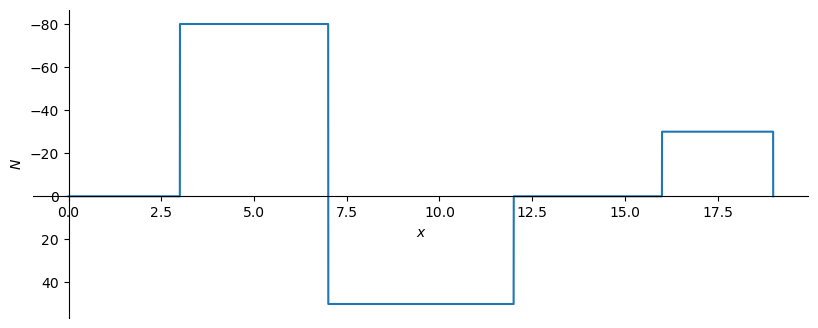

In [11]:
N_np = sym.lambdify(x, N.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(N.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'N({ab[i]}) = {N.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)} [kN]')

plt.figure(figsize=(10,4))
plt.plot(x_np,N_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$N$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

-2.96059473233392e-15*SingularityFunction(x, 0, 0) + 632.5*SingularityFunction(x, 3, -2) + 2.96059473233392e-15*SingularityFunction(x, 3, 0) + 3.5527136788005e-14*SingularityFunction(x, 7, 0) - 112.5*SingularityFunction(x, 7.0, -2) - 2.1316282072803e-14*SingularityFunction(x, 12, 0) + 180.0*SingularityFunction(x, 12.0, -2) - 4.21884749357561e-14*SingularityFunction(x, 12.0, 0) - 379.999999999999*SingularityFunction(x, 16, -2) + 1.37963714526753e-13*SingularityFunction(x, 16, 0) - 9.53311503811469e-14*SingularityFunction(x, 19, 0)

'V(0) = -2.96059473233392E-15 [kN]'

'V(3) = 0 [kN]'

'V(7) = 7.10542735760100E-15 [kN]'

'V(7.000000000000004) = 7.10542735760100E-15 [kN]'

'V(12) = -3.55271367880050E-15 [kN]'

'V(12.000000000000004) = -4.61852778244065E-14 [kN]'

'V(16) = 9.53311503811469E-14 [kN]'

'V(19) = 0 [kN]'

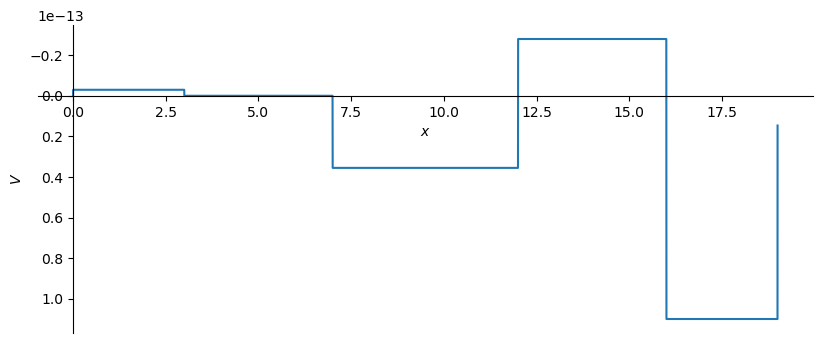

In [12]:
V_np = sym.lambdify(x, V.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(V.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'V({ab[i]}) = {V.subs(x,ab[i]+dx).subs(sol).subs(EI,ei).subs(EA,ea)} [kN]')

plt.figure(figsize=(10,4))
plt.plot(x_np,V_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'M(0) = 0.0 [kNm]'

'M(3) = oo [kNm]'

'M(7) = -1.77635683940076E-15 [kNm]'

'M(7.000000000000004) = -oo [kNm]'

'M(12) = 8.34887714518113E-14 [kNm]'

'M(12.000000000000004) = oo [kNm]'

'M(16) = -oo [kNm]'

'M(19) = 8.52651282912120E-14 [kNm]'

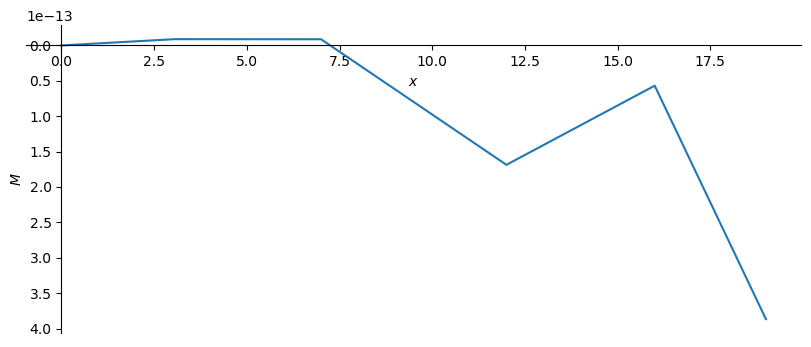

In [13]:
M_np = sym.lambdify(x, M.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

for i in range(len(ab)):
    display(f'M({ab[i]}) = {M.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)} [kNm]')

plt.figure(figsize=(10,4))
plt.plot(x_np,M_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$M$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'uv(0.0) = 0.0000 [m]'

'uv(3.0) = -0.0000 [m]'

'uv(7.0) = 0.3200 [m]'

'uv(7.0) = 0.3200 [m]'

'uv(12.0) = 0.0000 [m]'

'uv(12.0) = 0.0000 [m]'

'uv(16.0) = -0.0000 [m]'

'uv(19.0) = 0.3200 [m]'

'uh(0.0) = 0.0000 [m]'

'uh(3.0) = 0.0000 [m]'

'uh(7.0) = -0.8433 [m]'

'uh(7.0) = -0.8433 [m]'

'uh(12.0) = 0.0000 [m]'

'uh(12.0) = -0.0000 [m]'

'uh(16.0) = -0.9333 [m]'

'uh(19.0) = -0.8433 [m]'

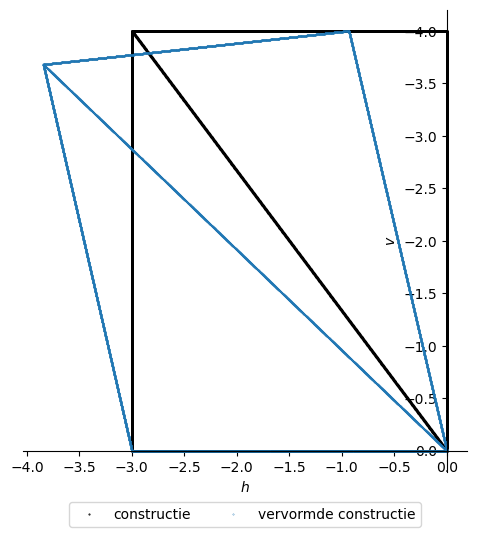

In [14]:
v_np = sym.lambdify(x, v.rewrite(sym.Piecewise))
h_np = sym.lambdify(x, h.rewrite(sym.Piecewise))

uv_np = sym.lambdify(x, uv.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
uh_np = sym.lambdify(x, uh.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

#display(uv.subs(sol))
for i in range(len(ab)):
    display(f'uv({ab[i]:.1f}) = {uv.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea):.4f} [m]')

for i in range(len(ab)):
    display(f'uh({ab[i]:.1f}) = {uh.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea):.4f} [m]')

plt.figure(figsize=(6,6))
plt.plot(h_np(x_np),v_np(x_np), marker='.',markersize=1, linewidth=0, color='black', label='constructie')
plt.plot((h_np(x_np)+uh_np(x_np)),(v_np(x_np)+uv_np(x_np)), marker='.',markersize=0.5, linewidth=0, label='vervormde constructie')
plt.xlabel('$h$')
plt.ylabel('$v$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
plt.axis('scaled')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=False, ncol=3);